Steps needed to be taken for the project 
1. Collect and preprocess the dataset(webscrap the tweet data from the start of covid to the end 2019 to 2021):Collect the dataset and preprocess it by cleaning, removing stop words, and stemming/lemmatizing the text.
2. Generate sentiment scores using multiple models: Use multiple models such as Vader, k means, and TextBlob to generate sentiment scores for each document in the dataset. This must show if the comments from the tweets are positive, negative or neutral. 
3. Incorporate transfer learning with RoBERTa: Use RoBERTa, a pre-trained transformer model, to generate sentiment scores for each document in the dataset. Fine-tune the RoBERTa model on a large corpus of text to improve its accuracy.
4. Combine the results: Combine the sentiment scores generated by the different models. You can use various techniques such as averaging, weighting, or more sophisticated ensemble learning approaches to combine the results.
5. Train the hybrid classification model: Use the combined sentiment scores as features to train a hybrid classification model. You can use various classifiers such as logistic regression, decision trees, or support vector machines. use the one with highest accuracy results. 
6. Do cross-validation to optimize the hyperparameters of the model.
7. Evaluate the model: Evaluate the performance of the hybrid classification model using metrics such as accuracy, precision, recall, and F1-score.
8. make sure sentiment analysis, wordcloud and frequent term analysis are used & shown as graphs

**Installation of required Libraries**

In [ ]:
#Installing Required packages
!pip install snscrape
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Libraries**

In [ ]:
#Importing Libraries
import snscrape.modules.twitter as sn
import pandas as pd
import re
import preprocessor as p
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer


**Fetching data from tweets and storing them in Dataframe**

In [ ]:
#We will initialize the start,end_date,keywords, number_of_tweets,
keywords=['covid','COVID']
start_date= '2019-11-01'
end_date = '2023-3-14'
number_of_tweets = 100000
tweets_list = [] #This list will store all tweets
language='en-US'
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sn.TwitterSearchScraper(f'{keywords} since:{start_date} until:{end_date} lang:{language}').get_items()):
    # when i will become equal to number of tweets, loop will break, else it will append data to tweets_list
    if i>=number_of_tweets:
        break
    tweets_list.append([tweet.content])
  
# Creating a dataframe from the tweets list above and giving column name Text
tweets_df = pd.DataFrame(tweets_list, columns=['Text'])

tweets_df

<ipython-input-5-194ed1c0e0fe>:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


,Text
0,"""Please help stop college vaccine mandates by ..."
1,@RonFilipkowski I take no responsibility for C...
2,OMG. The 🤡🌎 we live in. 😆\n\nWell done @covid_...
3,@1goodtern Well we already know that at least ...
4,"From too many COVID shots?\n\n(Of course, Fauc..."
...,...
995,@lauranissen That’s dope! I would love to teac...
996,@PolitlcsUK Their grandchildren will suffer th...
997,@Ma60818794David @MichaelPSenger You have to a...
998,Canadian mother wins battle against college ov...


**Data preprocessing**

---



---



**Data Cleaning**


*   Removing punctuations,lowercase,whitespaces,stopwards
*   Tokenization
*   lemmetization





In [ ]:
import nltk
from nltk.corpus import stopwords
import re
def cleanText(documents):
    NOT_IMPORTANT = ['nan', 'of', 'in', 'would', 'get', 'them', 'i', 'you']
    review = p.clean(documents) # removes URLs, Mentions, Reserved words (RT, FAV), and Emojis
    s = re.sub(r'[^a-zA-Z0-9\s]', '', documents) # remove punctuation
    s = re.sub('\s+',' ', s) #removing extra spaces
    s = str(s).lower() #lowercase the text
    
    tokens = [token for token in s.split(" ") if token != ""] #making list of words 
        
    tokens = [word for word in tokens if word not in stopwords.words('english')] # removing stopwards         
    tokenss = [] #list to store words after removing unimportant words
    for word in tokens: 
        if word not in NOT_IMPORTANT and word not in tokenss: #check to remove unneccassary words
            tokenss.append(word)
        
    review = ' '.join(tokenss) # join the cleaned list back to string
    
    
    review = p.clean(review) # removes URLs, Mentions, Reserved words (RT, FAV), and Emojis
    review = re.sub('covid', '', (review))

    #Initializing lemmetizer and tweetTokenizer instance
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()
    review = lemmatizer.lemmatize(review) # lemmanize tweets
    review = w_tokenizer.tokenize(review) # tokenize tweets
    return(review) 



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
tweets_df['cleaned_text'] = tweets_df['Text'].apply(cleanText)
# We have got list of words in each row in cleaned_text column so converting list into string by using join() method
tweets_df['Cleaned_string'] = [' '.join(map(str, l)) for l in tweets_df['cleaned_text']]
tweets_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Text,cleaned_text,Cleaned_string
0,"""Please help stop college vaccine mandates by ...","[please, help, stop, college, vaccine, mandate...",please help stop college vaccine mandates fill...
1,@RonFilipkowski I take no responsibility for C...,"[ronfilipkowski, take, responsibility, bankrup...",ronfilipkowski take responsibility bankrupted ...
2,OMG. The 🤡🌎 we live in. 😆\n\nWell done @covid_...,"[omg, live, well, done, parent]",omg live well done parent
3,@1goodtern Well we already know that at least ...,"[goodtern, well, already, know, least, childre...",goodtern well already know least children whos...
4,"From too many COVID shots?\n\n(Of course, Fauc...","[many, shots, course, fauci, attended, gridiro...",many shots course fauci attended gridiron dinner
...,...,...,...
995,@lauranissen That’s dope! I would love to teac...,"[lauranissen, thats, dope, love, teach, disast...",lauranissen thats dope love teach disaster edu...
996,@PolitlcsUK Their grandchildren will suffer th...,"[politlcsuk, grandchildren, suffer, shame, fut...",politlcsuk grandchildren suffer shame future t...
997,@Ma60818794David @MichaelPSenger You have to a...,"[ma60818794david, michaelpsenger, age, adjust,...",ma60818794david michaelpsenger age adjust ages...
998,Canadian mother wins battle against college ov...,"[canadian, mother, wins, battle, college, vacc...",canadian mother wins battle college vaccine re...


**Getting Insight into the Tweets**


**WordCloud**

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


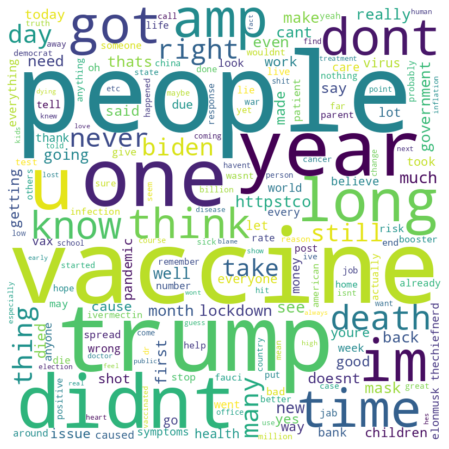

In [ ]:
# combine the text from the 'Text' column into a single string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

combined_document = ' '.join(tweets_df['Cleaned_string'])
# create a wordcloud object
wc = WordCloud(width=800, height=800, background_color='white', max_words=200)

# generate the wordcloud
wc.generate(combined_document)

# plot the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


**Generate sentiment scores using multiple models**

*   Vader 
*   k means
*   TextBlob 
*   Afinn
*   sentiwordnet
*   Roberta











**Generating Sentiment Scores using Vader**

In [ ]:
# NLP Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

#Initializing instance
sid = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment of a given review sentence-wise

def findTweetWiseSentimentScores(review): 
    # Replace "nan" with an empty string
    review = review.replace("nan", "")
    # Use the VADER sentiment analyzer to calculate the sentiment score for the review
    vader_score = sid.polarity_scores(review)["compound"]
    # Return the compound sentiment score
    return vader_score

# Define a function to calculate the sentiment of a given tweet column and add the sentiment to the DataFrame
def showTweetsSentment(df, column):
    # Replace any missing values in the review column with an empty string
    df[column] = df[column].fillna("")
    # Apply the findSentenceWiseSentiment function to each review in the column and add the resulting scores to a new 'vaderScore' column in the DataFrame
    df['vaderScore'] = df[column].apply(findTweetWiseSentimentScores)
    # Set the 'Sentiment' column of the DataFrame based on the value of the 'vaderScore' column
    df.loc[df["vaderScore"] > 0, "Vader_Sentiment"] = "Positive"
    df.loc[df["vaderScore"] < 0, "Vader_Sentiment"] = "Negative"
    df.loc[df["vaderScore"] == 0, "Vader_Sentiment"] = "Neutral"
    return df

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<AxesSubplot:xlabel='Vader_Sentiment', ylabel='count'>

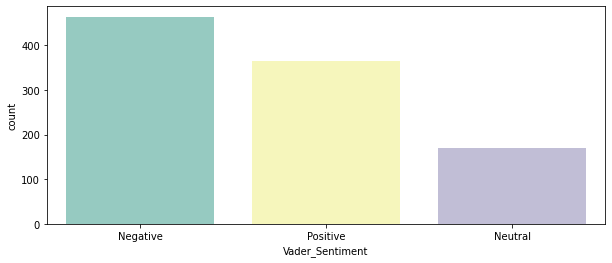

In [ ]:
#Importing seaborn library to plot bar plot
import seaborn as sns
# we will get dataframe from showTweetsSentment that contains vader_score and label
tweets_df=showTweetsSentment(tweets_df,'Cleaned_string')
#ploting sentiment labels using bar graph
plt.figure(figsize=(10, 4))
sns.countplot(x ='Vader_Sentiment', data = tweets_df, palette="Set3")

**Generating Sentiment Scores using K-means**

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Convert text data to a matrix of TF-IDF features
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(tweets_df['Cleaned_string'].to_numpy().tolist())

# Fit K-means model with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(tfidf)

# Assign sentiment labels to clusters
labels = kmeans.labels_  # Assign the cluster labels to each tweet
sentiment_scores = []    # Create an empty list to store the sentiment scores for each tweet
sentiments=[]            # Create an empty list to store the sentiment labels for each tweet

# Iterate through each tweet and assign a sentiment label based on its cluster
for i in range(len(labels)):
    if labels[i] == 0:
        sentiment_scores.append(0)  # Assign a score of 0 for a positive sentiment
        sentiments.append("Positive")  # Assign the label "Positive" for a positive sentiment
    elif labels[i] == 1:
        sentiment_scores.append(1)  # Assign a score of 1 for a negative sentiment
        sentiments.append("Negative")  # Assign the label "Negative" for a negative sentiment
    else:
        sentiment_scores.append(labels[i]) # For any other cluster label, assign the label as-is
        sentiments.append("Neutral")  # Assign the label "Neutral" for any other sentiment

# Add the sentiment scores and labels as new columns in the original DataFrame
tweets_df['kmeans_score'] = sentiment_scores
tweets_df['kmeans_sentiment'] = sentiments


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='kmeans_sentiment', ylabel='count'>

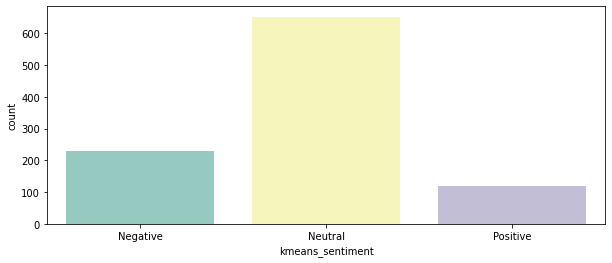

In [ ]:
#ploting bargraph using countplot() of seasborn module
plt.figure(figsize=(10, 4))
sns.countplot(x ='kmeans_sentiment', data = tweets_df, palette="Set3")

**TextBlob**

In [ ]:
# Import necessary libraries
from textblob import TextBlob

# Create empty lists to store sentiment scores and labels
scores = []
labels = []

# Get the cleaned tweet strings from the DataFrame and convert to a list
data = tweets_df['Cleaned_string'].to_numpy().tolist()

# Iterate through each tweet and calculate polarity score using TextBlob
for i in range(0, len(data)):
  # Create TextBlob object and calculate polarity score
  blob = TextBlob(data[i])
  polarity = blob.sentiment.polarity
  scores.append(polarity)

  # Assign sentiment label based on polarity score
  if polarity > 0:
    labels.append("Positive") # Assign the label "Positive" for a positive sentiment
  elif polarity < 0:
    labels.append("Negative") # Assign the label "Negative" for a negative sentiment
  else:
    labels.append("Neutral") # Assign the label "Neutral" for any other sentiment

# Add the sentiment scores and labels as new columns in the original DataFrame
tweets_df['TextBlob_score'] = scores
tweets_df['TextBlob_sentiment'] = labels


<AxesSubplot:xlabel='TextBlob_sentiment', ylabel='count'>

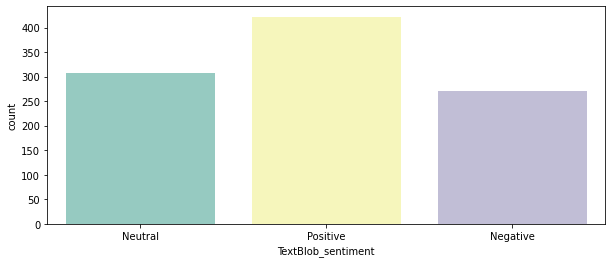

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x ='TextBlob_sentiment', data = tweets_df, palette="Set3")

**Afinn**

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=1193baed82c22fed06a52c78fb54d16948af3f39bdbbce708f246c616448d415
  Stored in directory: /root/.cache/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


<AxesSubplot:xlabel='Afinn_sentiment', ylabel='count'>

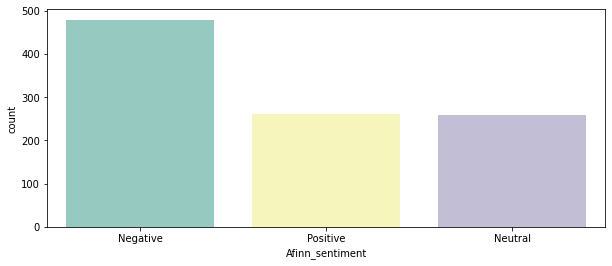

In [ ]:
# Import necessary libraries
import re
from afinn import Afinn

# Create an Afinn object
afinn = Afinn()

# Create empty lists to store sentiment scores and labels
ss = []  # sentiment scores
l = []   # sentiment labels

# Iterate through each tweet and calculate sentiment score using Afinn
for document in tweets_df['Cleaned_string'].to_numpy().tolist():
    score = afinn.score(document) # Calculate the sentiment score using Afinn
    ss.append(score)  # Append the score to the list of sentiment scores

    # Assign sentiment label based on the score
    if score > 0:
        l.append("Positive") # Assign the label "Positive" for a positive sentiment
    elif score < 0:
        l.append("Negative") # Assign the label "Negative" for a negative sentiment
    else:
        l.append("Neutral") # Assign the label "Neutral" for any other sentiment

# Add the sentiment scores and labels as new columns in the original DataFrame
tweets_df['Afinn_score'] = ss
tweets_df['Afinn_sentiment'] = l

# Visualize the distribution of sentiment labels using a countplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.countplot(x ='Afinn_sentiment', data = tweets_df, palette="Set3")


**Sentiwordnet**

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<AxesSubplot:xlabel='sentiwordnet_sentiment', ylabel='count'>

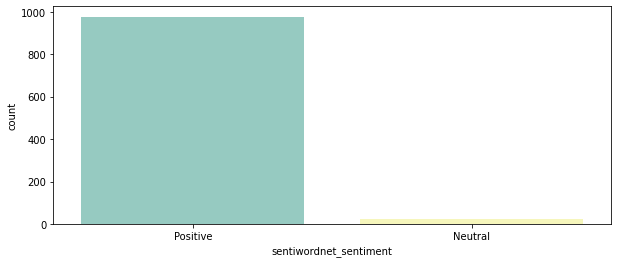

In [ ]:
# Import necessary libraries
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
import nltk
nltk.download('sentiwordnet')
nltk.download('punkt')

# Define a function for sentiment analysis using SentiWordNet
def sentiment_analysis(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Initialize scores
    pos_score = 0
    neg_score = 0
    
    # Calculate sentiment scores for each word
    for word in words:
        # Get sentiment scores for the word from SentiWordNet
        synsets = swn.senti_synsets(word)
        
        # Sum the positive and negative scores for all synsets
        if synsets:
            pos_score += sum([s.pos_score() for s in synsets])
            neg_score += sum([s.neg_score() for s in synsets])
    
    # Calculate overall sentiment score
    if pos_score > neg_score:
        score = pos_score - neg_score
        label = "Positive"
    elif neg_score > pos_score:
        score = neg_score - pos_score
        label = "Negative"
    else:
        score = 0
        label = "Neutral"
    
    return score, label

# Create empty lists to store sentiment scores and labels
s = []   # sentiment scores
lb = []  # sentiment labels

# Iterate through each tweet and calculate sentiment score using SentiWordNet
for document in tweets_df['Cleaned_string'].to_numpy().tolist():
    score, label = sentiment_analysis(document)  # Calculate sentiment score and label using the defined function
    s.append(score)  # Append the score to the list of sentiment scores
    lb.append(label)  # Append the label to the list of sentiment labels

# Add the sentiment scores and labels as new columns in the original DataFrame
tweets_df['sentiwordnet_score'] = s
tweets_df['sentiwordnet_sentiment'] = lb

# Visualize the distribution of sentiment labels using a countplot
plt.figure(figsize=(10, 4))
sns.countplot(x ='sentiwordnet_sentiment', data = tweets_df, palette="Set3")


**RoBERTa**

*   Incorporate transfer learning with RoBERTa: Use RoBERTa, a pre-trained transformer model, to generate sentiment scores for each document in the dataset.
*   Fine-tune the RoBERTa model on a large corpus of text to improve its accuracy.

In [ ]:
!pip install transformers
!pip install torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 72.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import required libraries
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch.nn as nn

# Define the pre-trained model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizer.from_pretrained(roberta)
model = RobertaForSequenceClassification.from_pretrained(roberta, num_labels=3)

# Extract the cleaned string from the tweets dataframe and convert to list
documents=tweets_df['Cleaned_string'].to_numpy().tolist()

# Initialize a list to store sentiment scores
sentiment_scores=[]

# Loop through each document and calculate sentiment score using RoBERTa
for document in documents:
  # Tokenize each document using the RoBERTa tokenizer
  tokens = tokenizer.encode(document, return_tensors='pt')
  
  # Get the model output for the tokenized document
  output = model(tokens)

  # Extract the scores from the output and convert to numpy array
  scores = output[0][0].detach().numpy()
  
  # Calculate the sentiment score from the scores array
  sentiment_score = scores.argmax().item() - 1
  
  # Append the sentiment score to the list
  sentiment_scores.append(sentiment_score)
  
# Initialize an empty list
labels=[]
#Add labels based on the sentiment score
for sentiment_score in sentiment_scores:
  if sentiment_score > 0: #if score greater than 0 assign it positive
      labels.append("Positive")
  elif sentiment_score < 0:
      labels.append("Negative") #if score less than 0 assign it negative
  else:
      labels.append("Neutral") #else Neutral if score==0

#Add the sentiment scores  and labels to the tweets_df DataFrame
tweets_df['Roberta_score']=sentiment_scores
tweets_df['Roberta_labels']=labels


<AxesSubplot:xlabel='Roberta_labels', ylabel='count'>

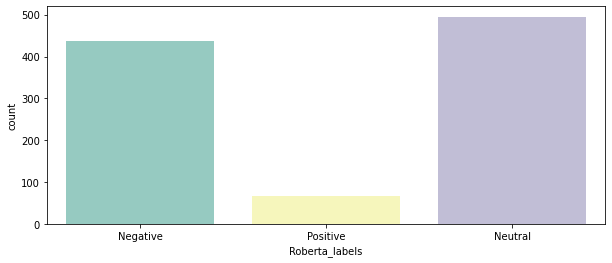

In [ ]:
#Ploting bargraph for labels predicted by Roberta model
plt.figure(figsize=(10, 4))
sns.countplot(x ='Roberta_labels', data = tweets_df, palette="Set3")

**Normalization of Sentiment score**


In [ ]:
#Below code assigns sentiment scores to each tweet based on the sentiment analysis performed using various libraries (Vader, KMeans, TextBlob, Afinn, and SentiWordNet). 
#The scores are converted into a scale of -1 to 1, where -1 represents a negative sentiment, 0 represents a neutral sentiment, and 1 represents a positive sentiment.
import numpy as np
#The code uses numpy's where function to assign a numerical sentiment score to each tweet based on the sentiment Label.
#If the sentiment is positive, the score is assigned a value of 1, if it is negative, it is assigned a value of -1, and if it is neutral, the score is assigned a value of 0.
tweets_df['vScore'] = np.where(tweets_df['Vader_Sentiment'] =="Positive",1, np.where(tweets_df['Vader_Sentiment'] =="Neutral", 0, np.where(tweets_df['Vader_Sentiment'] == "Negative",-1, tweets_df['Vader_Sentiment'])))
tweets_df['kmeans_score'] = np.where(tweets_df['kmeans_sentiment'] =="Positive",1, np.where(tweets_df['kmeans_sentiment'] =="Neutral", 0, np.where(tweets_df['kmeans_sentiment'] == "Negative",-1, tweets_df['kmeans_sentiment'])))
tweets_df['TBscore'] = np.where(tweets_df['TextBlob_sentiment'] =="Positive",1, np.where(tweets_df['TextBlob_sentiment'] =="Neutral", 0, np.where(tweets_df['TextBlob_sentiment'] == "Negative",-1, tweets_df['TextBlob_sentiment'])))
tweets_df['Afinn_score'] = np.where(tweets_df['Afinn_sentiment'] =="Positive",1, np.where(tweets_df['Afinn_sentiment'] =="Neutral", 0, np.where(tweets_df['Afinn_sentiment'] == "Negative",-1, tweets_df['Afinn_sentiment'])))
tweets_df['sentiwn_score'] = np.where(tweets_df['sentiwordnet_sentiment'] =="Positive",1, np.where(tweets_df['sentiwordnet_sentiment'] =="Neutral", 0, np.where(tweets_df['sentiwordnet_sentiment'] == "Negative",-1, tweets_df['sentiwordnet_sentiment'])))
tweets_df


,Text,cleaned_text,Cleaned_string,vaderScore,Vader_Sentiment,kmeans_score,kmeans_sentiment,TextBlob_score,TextBlob_sentiment,Afinn_score,Afinn_sentiment,sentiwordnet_score,sentiwordnet_sentiment,Roberta_score,Roberta_labels,vScore,TBscore,sentiwn_score
0,"""Please help stop college vaccine mandates by ...","[please, help, stop, college, vaccine, mandate...",please help stop college vaccine mandates fill...,-0.2023,Negative,-1,Negative,0.000000,Neutral,-1,Negative,9.500,Positive,-1,Negative,-1,0,1
1,@RonFilipkowski I take no responsibility for C...,"[ronfilipkowski, take, responsibility, bankrup...",ronfilipkowski take responsibility bankrupted ...,0.6808,Positive,-1,Negative,1.000000,Positive,1,Positive,26.167,Positive,-1,Negative,1,1,1
2,OMG. The 🤡🌎 we live in. 😆\n\nWell done @covid_...,"[omg, live, well, done, parent]",omg live well done parent,0.2732,Positive,0,Neutral,0.136364,Positive,0,Neutral,10.417,Positive,1,Positive,1,1,1
3,@1goodtern Well we already know that at least ...,"[goodtern, well, already, know, least, childre...",goodtern well already know least children whos...,-0.4404,Negative,-1,Negative,-0.070833,Negative,-1,Negative,14.042,Positive,-1,Negative,-1,-1,1
4,"From too many COVID shots?\n\n(Of course, Fauc...","[many, shots, course, fauci, attended, gridiro...",many shots course fauci attended gridiron dinner,0.0000,Neutral,0,Neutral,0.500000,Positive,0,Neutral,0.500,Positive,0,Neutral,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,@lauranissen That’s dope! I would love to teac...,"[lauranissen, thats, dope, love, teach, disast...",lauranissen thats dope love teach disaster edu...,0.2263,Positive,0,Neutral,0.208333,Positive,1,Positive,7.750,Positive,1,Positive,1,1,1
996,@PolitlcsUK Their grandchildren will suffer th...,"[politlcsuk, grandchildren, suffer, shame, fut...",politlcsuk grandchildren suffer shame future t...,-0.8360,Negative,0,Neutral,-0.166667,Negative,-1,Negative,14.000,Positive,-1,Negative,-1,-1,1
997,@Ma60818794David @MichaelPSenger You have to a...,"[ma60818794david, michaelpsenger, age, adjust,...",ma60818794david michaelpsenger age adjust ages...,0.0000,Neutral,0,Neutral,0.000000,Neutral,0,Neutral,0.750,Positive,0,Neutral,0,0,1
998,Canadian mother wins battle against college ov...,"[canadian, mother, wins, battle, college, vacc...",canadian mother wins battle college vaccine re...,0.2732,Positive,1,Positive,0.300000,Positive,1,Positive,1.625,Positive,0,Neutral,1,1,1


**Calculating Weighted Average of all Models**

In [ ]:
import numpy as np

#Define the weights for each sentiment analysis model
weights = [0.2, 0.2, 0.2,0.2,0.2]

# Calculate weighted average score
weighted_scores = tweets_df[['vScore', 'kmeans_score', 'TBscore','Afinn_score','sentiwn_score']].mul(weights).sum(axis=1)

# Round scores to nearest integer
tweets_df['Average_scores'] = weighted_scores.round().astype(int)

#Define a function that maps sentiment scores to sentiment label.
def get_sentiment_label(score):
    if score == -1:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score == 1:
        return 'Positive'

#Apply the get_sentiment_label() function to the Average_scores column to get the sentiment labels
tweets_df['Sentiment_Label'] = tweets_df['Average_scores'].apply(get_sentiment_label)

tweets_df

,Text,cleaned_text,Cleaned_string,vaderScore,Vader_Sentiment,kmeans_score,kmeans_sentiment,TextBlob_score,TextBlob_sentiment,Afinn_score,Afinn_sentiment,sentiwordnet_score,sentiwordnet_sentiment,Roberta_score,Roberta_labels,vScore,TBscore,sentiwn_score,Average_scores,Sentiment_Label
0,"""Please help stop college vaccine mandates by ...","[please, help, stop, college, vaccine, mandate...",please help stop college vaccine mandates fill...,-0.2023,Negative,-1,Negative,0.000000,Neutral,-1,Negative,9.500,Positive,-1,Negative,-1,0,1,0,Neutral
1,@RonFilipkowski I take no responsibility for C...,"[ronfilipkowski, take, responsibility, bankrup...",ronfilipkowski take responsibility bankrupted ...,0.6808,Positive,-1,Negative,1.000000,Positive,1,Positive,26.167,Positive,-1,Negative,1,1,1,1,Positive
2,OMG. The 🤡🌎 we live in. 😆\n\nWell done @covid_...,"[omg, live, well, done, parent]",omg live well done parent,0.2732,Positive,0,Neutral,0.136364,Positive,0,Neutral,10.417,Positive,1,Positive,1,1,1,1,Positive
3,@1goodtern Well we already know that at least ...,"[goodtern, well, already, know, least, childre...",goodtern well already know least children whos...,-0.4404,Negative,-1,Negative,-0.070833,Negative,-1,Negative,14.042,Positive,-1,Negative,-1,-1,1,-1,Negative
4,"From too many COVID shots?\n\n(Of course, Fauc...","[many, shots, course, fauci, attended, gridiro...",many shots course fauci attended gridiron dinner,0.0000,Neutral,0,Neutral,0.500000,Positive,0,Neutral,0.500,Positive,0,Neutral,0,1,1,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,@lauranissen That’s dope! I would love to teac...,"[lauranissen, thats, dope, love, teach, disast...",lauranissen thats dope love teach disaster edu...,0.2263,Positive,0,Neutral,0.208333,Positive,1,Positive,7.750,Positive,1,Positive,1,1,1,1,Positive
996,@PolitlcsUK Their grandchildren will suffer th...,"[politlcsuk, grandchildren, suffer, shame, fut...",politlcsuk grandchildren suffer shame future t...,-0.8360,Negative,0,Neutral,-0.166667,Negative,-1,Negative,14.000,Positive,-1,Negative,-1,-1,1,0,Neutral
997,@Ma60818794David @MichaelPSenger You have to a...,"[ma60818794david, michaelpsenger, age, adjust,...",ma60818794david michaelpsenger age adjust ages...,0.0000,Neutral,0,Neutral,0.000000,Neutral,0,Neutral,0.750,Positive,0,Neutral,0,0,1,0,Neutral
998,Canadian mother wins battle against college ov...,"[canadian, mother, wins, battle, college, vacc...",canadian mother wins battle college vaccine re...,0.2732,Positive,1,Positive,0.300000,Positive,1,Positive,1.625,Positive,0,Neutral,1,1,1,1,Positive


Text(0.5, 1.0, 'Weighted Average Label of all Models')

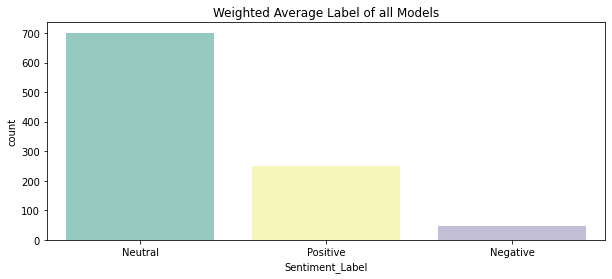

In [ ]:
#This piece of code will generate bargraph of average of all weighted scores labels
plt.figure(figsize=(10, 4))
sns.countplot(x ='Sentiment_Label', data = tweets_df, palette="Set3")
plt.title("Weighted Average Label of all Models")

**Fine Tuning Roberta Model**

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

#extract only required columns from the DataFrame and reset index
data = tweets_df[['Cleaned_string', 'Sentiment_Label']]
data = data.reset_index(drop=True)


# load pre-trained RoBERTa model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizer.from_pretrained(roberta)
model = RobertaForSequenceClassification.from_pretrained(roberta, num_labels=3)

# define function to preprocess data for fine-tuning
def preprocess_data(data):
    # encode labels as integers
    label_map = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
    labels = [label_map[label] for label in data['Sentiment_Label']]
    # tokenize input text
    encoded_inputs = tokenizer(data['Cleaned_string'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')
    return {'input_ids': encoded_inputs['input_ids'], 'attention_mask': encoded_inputs['attention_mask'], 'labels': torch.tensor(labels)}

# Split dataframe into training and testing datasets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# preprocess training and validation data
train_dataset = preprocess_data(train_data)
val_dataset = preprocess_data(val_data)

# define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=100,
    load_best_model_at_end=True
)

# define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

#create a DataLoader for training data
train_loader = DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True)

#train the model
for epoch in range(training_args.num_train_epochs):
  try:
      for step, batch in enumerate(train_loader):
          inputs = {
              "input_ids": batch["input_ids"],
              "attention_mask": batch["attention_mask"],
              "labels": batch["labels"],
          }
          outputs = model(**inputs)
          loss = outputs.loss
          loss.backward()
          optimizer.step()
          scheduler.step()
          model.zero_grad()

          if step % 10 == 0:
              print(f"Epoch: {epoch}, Step: {step}, Loss: {loss.item()}")   
  except:
      pass


# save fine-tuned model
trainer.save_model('./sentiment_model')


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Saving model checkpoint to ./sentiment_model
Configuration saved in ./sentiment_model/config.json
Model weights saved in ./sentiment_model/pytorch_model.bin
tokenizer config file saved in ./sentiment_model/tokenizer_config.json
Special tokens file saved in ./sentiment_model/special_tokens_map.json


**Load Fine Tune model to predict Sentiment scores**

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# load tokenizer and model from current directory which we saved
tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = RobertaForSequenceClassification.from_pretrained("./sentiment_model")

# set evaluation mode
model.eval()

# prepare data
documents = tweets_df['Cleaned_string'].tolist() #convert df to list
sentiment_scores = []
scores=[]
labels=[]
# loop through documents and predict sentiment score
for document in documents:
    # tokenize input text
    inputs = tokenizer(document, return_tensors="pt")
    # make prediction
    outputs = model(**inputs)
    # get predicted label
    predicted_label = torch.argmax(outputs[0]).item() - 1
    sentiment_scores.append(predicted_label)

#Add labels based on the sentiment score
for sentiment_score in sentiment_scores:
  if sentiment_score > 0:
      labels.append("Positive")
      scores.append(2)
  elif sentiment_score < 0:
      labels.append("Negative")
      scores.append(0)
  else:
      labels.append("Neutral")
      scores.append(1)

#creating new columns to create two columns
tweets_df['Tuned_Roberta_score']=scores
tweets_df['Tuned_Roberta_labels']=labels


loading file vocab.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/daefdd1f6ae931839bce4d0f3db0a1a4265cd50f/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/daefdd1f6ae931839bce4d0f3db0a1a4265cd50f/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/daefdd1f6ae931839bce4d0f3db0a1a4265cd50f/special_tokens_map.json
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--cardiffnlp--twitter-roberta-base-sentiment/snapshots/daefdd1f6ae931839bce4d0f3db0a1a4265cd50f/config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSeque

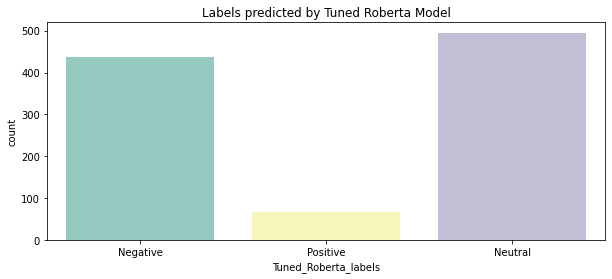

In [ ]:
#plot the sentiment labels predicted by Tuned Roberta model
plt.figure(figsize=(10, 4))
sns.countplot(x='Tuned_Roberta_labels', data=tweets_df, palette="Set3")
plt.title("Labels predicted by Tuned Roberta Model")
plt.show()


**Averaging Sentiment Scores of all the models to get Final Score**

In [ ]:
tweets_df.columns

Index(['Text', 'cleaned_text', 'Cleaned_string', 'vaderScore',
       'Vader_Sentiment', 'kmeans_score', 'kmeans_sentiment', 'TextBlob_score',
       'TextBlob_sentiment', 'Afinn_score', 'Afinn_sentiment',
       'sentiwordnet_score', 'sentiwordnet_sentiment', 'Roberta_score',
       'Roberta_labels', 'vScore', 'TBscore', 'sentiwn_score',
       'Average_scores', 'Sentiment_Label', 'Tuned_Roberta_score',
       'Tuned_Roberta_labels'],
      dtype='object')

In [ ]:
from statistics import mean
# Define a function to calculate the average sentiment score from all models for a given text

def get_average_sentiment(row):
    scores = [row[model] for model in ['vaderScore', 'kmeans_score', 'TextBlob_score','Afinn_score','sentiwordnet_score','Roberta_score','Tuned_Roberta_score']]
    return mean(scores)

# Apply the function to each row of the DataFrame to calculate the average sentiment score
tweets_df['average_score'] = tweets_df.apply(get_average_sentiment, axis=1)

# Print the DataFrame with the new 'average_score' column


# Define the weights
weights = [0.14, 0.14, 0.14,0.14,0.14,0.14,0.16]

# Calculate weighted average score
weighted_scores = tweets_df[['vScore', 'kmeans_score', 'TBscore','Afinn_score','sentiwn_score','Roberta_score','Tuned_Roberta_score']].mul(weights).sum(axis=1)

# Round scores to nearest integer
tweets_df['Combined_scores'] = weighted_scores.round().astype(int)
tweets_df['average_score'] = weighted_scores
#assign labels based on condition which score satisfies
def get_sentiment_label(score):
    if score == -1:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score == 1:
        return 'Positive'
#create final label for ML target variable
tweets_df['Label'] = tweets_df['Combined_scores'].apply(get_sentiment_label)


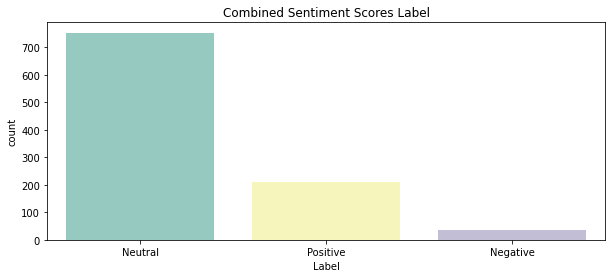

In [ ]:
#plot Finalized hybrid model labels
plt.figure(figsize=(10, 4))
sns.countplot(x='Label', data=tweets_df, palette="Set3")
plt.title("Combined Sentiment Scores Label")
plt.show()

*** Train the hybrid classification model: Use the combined sentiment scores as features to train a hybrid classification model. You can use various classifiers such as logistic regression, decision trees, or support vector machines. use the one with highest accuracy results. ***

In [ ]:
#Importing necassary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df['average_score'], tweets_df['Label'], test_size=0.2)

**Logistic Model**

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.96      1.00      0.98       155
    Positive       1.00      1.00      1.00        38

    accuracy                           0.96       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.93      0.96      0.95       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

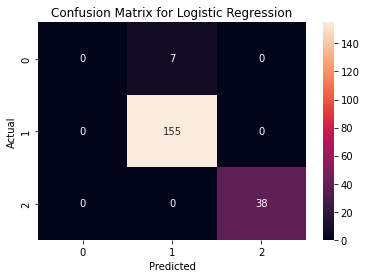

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set using logistic regression
lr_y_pred = lr_model.predict(X_test.values.reshape(-1, 1))

# Calculate the evaluation metrics of the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_y_pred)*100
lr_error_rate = (100 - lr_accuracy) 
lr_precision = precision_score(y_test, lr_y_pred, average='micro') *100
lr_sensitivity = recall_score(y_test, lr_y_pred, average='micro') *100
lr_specificity = recall_score(y_test, lr_y_pred, pos_label=0, average='micro') *100

# Print the classification report
print(classification_report(y_test, lr_y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, lr_y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Random Forest**

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       1.00      1.00      1.00       155
    Positive       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


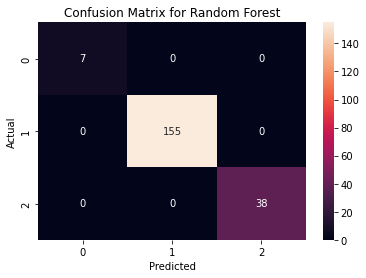

In [ ]:
# Train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set using random forest
rf_y_pred = rf_model.predict(X_test.values.reshape(-1, 1))

# Calculate the evaluation metrics of the random forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred) *100
rf_error_rate = (100 - rf_accuracy) 
rf_precision = precision_score(y_test, rf_y_pred, average='micro') *100
rf_sensitivity = recall_score(y_test, rf_y_pred, average='micro') *100
rf_specificity = recall_score(y_test, rf_y_pred, pos_label=0, average='micro') *100

# Print the classification report
print(classification_report(y_test, rf_y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree**

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       1.00      1.00      1.00       155
    Positive       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


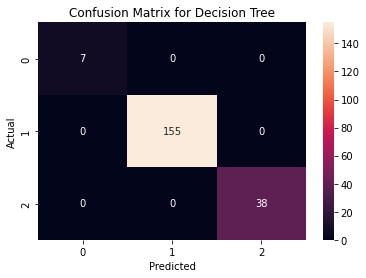

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Evaluate the performance of the classifier
# Calculate the evaluation metrics of the logistic regression model
dt_accuracy = accuracy_score(y_test, y_pred) *100
dt_error_rate = (100 - dt_accuracy) 
dt_precision = precision_score(y_test, y_pred, average='micro') *100
dt_sensitivity = recall_score(y_test, y_pred, average='micro') *100
dt_specificity = recall_score(y_test, y_pred, pos_label=0, average='micro') *100

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**SVM**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.96      1.00      0.98       155
    Positive       1.00      1.00      1.00        38

    accuracy                           0.96       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.93      0.96      0.95       200



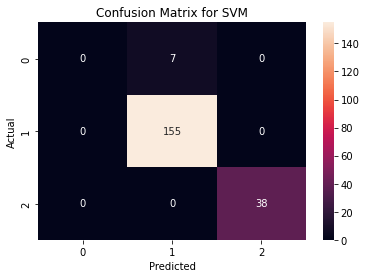

In [ ]:
# SVM
from sklearn.svm import SVC
# Initialize the SVM classifier
clf = SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test.values.reshape(-1, 1))

# Evaluate the performance of the classifier
# Calculate the evaluation metrics of the logistic regression model
svm_accuracy = accuracy_score(y_test, y_pred) *100
svm_error_rate = (100 - svm_accuracy)
svm_precision = precision_score(y_test, y_pred, average='micro') *100
svm_sensitivity = recall_score(y_test, y_pred, average='micro') *100
svm_specificity = recall_score(y_test, y_pred, pos_label=0, average='micro') *100

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Stacking Classifier**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       1.00      1.00      1.00       155
    Positive       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



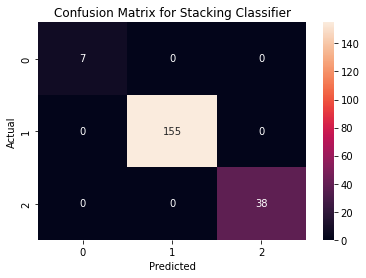

In [ ]:
## Stacking classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


# Initialize base classifiers
clf3 = GradientBoostingClassifier(random_state=42)
clf4 = SVC(kernel='linear')

# Initialize meta classifier
meta_clf = LogisticRegression()

# Initialize the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[ ('gb', clf3), ('svm', clf4)],
    final_estimator=meta_clf
)


# Train the classifier on the training data
stacking_clf.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test.values.reshape(-1, 1))

# Evaluate the performance of the classifier
stack_accuracy = accuracy_score(y_test, y_pred) *100
stack_error_rate = (100 - stack_accuracy)
stack_precision = precision_score(y_test, y_pred, average='micro') *100
stack_sensitivity = recall_score(y_test, y_pred, average='micro') *100
stack_specificity = recall_score(y_test, y_pred, pos_label=0, average='micro') *100

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Statistics**

In [ ]:
# Create a DataFrame with the evaluation metrics for both models
df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree','SVM','Stacking Classifier'],
    'Accuracy': [lr_accuracy, rf_accuracy,dt_accuracy,svm_accuracy,stack_accuracy],
    'Error rate': [lr_error_rate, rf_error_rate,dt_error_rate,svm_error_rate,stack_error_rate],
    'Precision': [lr_precision, rf_precision,dt_precision,svm_precision,stack_precision],
    'Sensitivity': [lr_sensitivity, rf_sensitivity,dt_sensitivity,svm_sensitivity,stack_sensitivity],
    'Specificity': [lr_specificity, rf_specificity,dt_specificity,svm_specificity,stack_specificity]
})

# Set the "Model" column as the index
df.set_index('Model', inplace=True)
df

,Accuracy,Error rate,Precision,Sensitivity,Specificity
Model,,,,,
Logistic Regression,96.5,3.5,96.5,96.5,96.5
Random Forest,100.0,0.0,100.0,100.0,100.0
Decision Tree,100.0,0.0,100.0,100.0,100.0
SVM,96.5,3.5,96.5,96.5,96.5
Stacking Classifier,100.0,0.0,100.0,100.0,100.0


**Hyperparameter Tuning of Stacking Classifier**
Please run this cell only if you want to get optimized Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier


# Initialize base classifiers
clf1 = LogisticRegression(C=1, max_iter=1000, solver='liblinear')
clf4 = SVC(kernel='linear', C=1)

# Initialize meta classifier
meta_clf = LogisticRegression(C=1, max_iter=1000, solver='liblinear')

# Initialize the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('lr', clf1), ('svm', clf4)],
    final_estimator=meta_clf
)

# Define parameter grid for tuning
param_grid = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__penalty': ['l1', 'l2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=stacking_clf,
    param_grid=param_grid,
    cv=5
)

# Train the GridSearchCV object on the training data
grid_search.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the testing data using the best estimator found by GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test.values.reshape(-1, 1))

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 1.0
Best Hyperparameters: {'final_estimator__C': 0.1, 'final_estimator__penalty': 'l1', 'lr__C': 0.1, 'lr__penalty': 'l1', 'svm__C': 0.1, 'svm__kernel': 'poly'}


**Running the Stacking Classifier with Best parameters**
Please add best parameters in classifier estimator ---below and run the code

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         7
     Neutral       1.00      1.00      1.00       155
    Positive       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


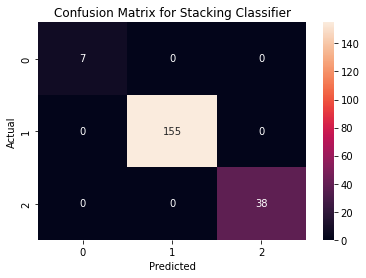

In [ ]:
## Stacking classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


# Initialize base classifiers
clf1 = LogisticRegression(C=1, max_iter=1000,penalty='l2',solver='liblinear')
clf4 = SVC(kernel='poly', C=0.1)

# Initialize meta classifier
meta_clf = LogisticRegression(C=10, penalty='l2')

# Initialize the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('lr', clf1), ('svm', clf4)],
    final_estimator=meta_clf
)


# Train the classifier on the training data
stacking_clf.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the testing data
y_pred = stacking_clf.predict(X_test.values.reshape(-1, 1))

# Evaluate the performance of the classifier
stack_accuracy = accuracy_score(y_test, y_pred)*100
stack_error_rate = (100 - stack_accuracy)
stack_precision = precision_score(y_test, y_pred, average='micro')*100
stack_sensitivity = recall_score(y_test, y_pred, average='micro')*100
stack_specificity = recall_score(y_test, y_pred, pos_label=0, average='micro')*100

# Print the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d')
# Add labels, title, and ticks
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()